## Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [9]:
def intensity(wave_fn):
    # total intensity ~ (total wave_fn)^2
    intensity = wave_fn**2
    return intensity

def wave_sum(wave_1_fn, wave_2_fn):
    wave_fn = wave_1_fn + wave_2_fn
    return wave_fn

def theta_shifter(theta):
    # shifts theta so it is in range -pi <= theta <= +pi
    theta_abs = abs(theta)    
    if theta_abs >= np.pi:
        cycles_to_shift = 1 + ((theta_abs - np.pi)/(2*np.pi)) // 1
        theta_abs_shifted = theta_abs - (2*np.pi * cycles_to_shift)   
        if theta >= 0:
            theta_shifted = theta_abs_shifted
        else:
            theta_shifted = -theta_abs_shifted            
    else:
        theta_shifted = theta   
    return theta_shifted

def cosine_n_terms(theta,n):
    # n = number of terms (not order)
    # 2n = order
    # cosine(theta) ~= ((-1)^n)*(theta^(2n))/(2n)!
    #               ~= 1 - theta^2/2! + theta^4/4! - theta^6/6! + ...
    cos_nth = 0
    # must have -pi <= theta <= +pi for cosine approx., so shift theta as needed
    theta_shifted = theta_shifter(theta)   
    for i in range(n):
        power_neg_one = (-1)**i
        power_theta = theta_shifted**(2*i)
        fact = np.math.factorial(2*i)   
        cos_nth += power_neg_one * power_theta / fact
    return cos_nth

def wave_function(t, x, y, params, wave):
    n = params['n']
    k = params['k']
    omega = params['omega']
    decay_exp = params['decay_exp']
    
    x0 = wave['x0']
    y0 = wave['y0']
    phi = wave['phi']
    
    # distance from source
    r = ((x - x0)**2 + (y - y0)**2)**0.5    
    # wave function argument
    theta = k * r - omega * t + phi                                
    # wave function undecayed
    wave_fn = cosine_n_terms(theta,n)    
    # decayed wave function
    #decayed_wave_fn = wave_fn * r**decay_exp    
    #return decayed_wave_fn
    return wave_fn

## Constants

In [10]:
# wave speed
v = 0.3

# phase shifts of sources
phi_1 = 0
phi_2 = 0

# decay exponent (power of r to show wave dissipation)
# for spherical wave: (ideal decay ->) -1 <= decay_exp <= 0 (<- no decay)
# but -1 is too strong for graphic display
decay_exp = 0

# number of terms in cosine approximation
n = 5

# time; consider only t=0 for now
t = 0.

## Input parameters

In [11]:
# number of points to plot along each axis 
# (total number of points on map = num_pts^2)
num_pts = 25

# frequency
f = 0.509

# source separation
d = 3

## Wave parameters

In [12]:
# angular frequency [rad/s]
omega = 2 * np.pi * f

# wave number [rad/m]
k = omega / v

## Plot parameters

In [13]:
# PLOT PARAMETERS

x_min = 0.
x_max = 10.
y_min = -5.
y_max = 5.

# np.linspace(min, max, num) returns num evenly spaced numbers over interval min,max
# creates row array
x_s = np.linspace(x_min, x_max, num_pts)
# creates column array if '.reshape(-1,1)'
y_s = np.linspace(y_min, y_max, num_pts).reshape(-1, 1)

# need to create empty arrays to use in nested loop below
wave_1_fn_s = np.empty((num_pts, num_pts))
wave_2_fn_s = np.empty((num_pts, num_pts))

#TODO add color maps dict
#COLOR_MAP_S ={}

## Calculate intensities and create plots

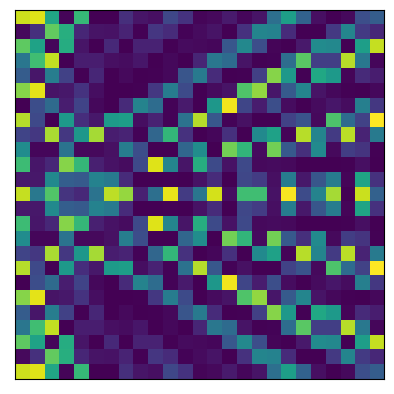

In [14]:
# create a Figure 'fig' and Axes 'ax'
fig, ax = plt.subplots()
       
# Source positions
x0_1 = 0.
y0_1 = d / 2.
x0_2 = 0.
y0_2 = -y0_1
        
# dicts for wave parameters
common = {'omega':omega, 'k':k, 'decay_exp':decay_exp, 'n':n}
wave_1 = {'x0':x0_1, 'y0':y0_1, 'phi':phi_1}
wave_2 = {'x0':x0_2, 'y0':y0_2, 'phi':phi_2}
    
# wave function arrays filled w/loops because cannot use ">" w arrays in functions
for p in range(0,num_pts):
    x = x_s[p]
    for q in range (0,num_pts):
        y = y_s[q]

        wave_1_fn_s[q,p] = wave_function(t, x, y, common, wave_1)
        wave_2_fn_s[q,p] = wave_function(t, x, y, common, wave_2)
    
        # Entire arrays filled by single calls
        # total wave function array due to superposition
        wave_fn_s = wave_sum(wave_1_fn_s, wave_2_fn_s)   
        # total intensities array
        intensity_s = intensity(wave_fn_s)
        #print(intensity_s[q,p])
               
# removes subdivisions (ticks) on axes since [] is empty
ax.set_xticks([])
ax.set_yticks([])
    
ax.imshow(intensity_s, cmap=None)
#TODO try different colormaps - default is viridis 
#https://matplotlib.org/stable/tutorials/colors/colormaps.html

plt.show()